In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
class DVBS2X:
    def __init__(self, num_symbols, samples_per_symbol, carrier_freq):
        self.num_symbols = num_symbols
        self.samples_per_symbol = samples_per_symbol
        self.carrier_freq = carrier_freq
    
    def generate_qpsk(self):
        bits = np.random.randint(0, 2, 2 * self.num_symbols)
        
        qpsk_map = {
            (0, 0): 1 + 1j,
            (0, 1): -1 + 1j,
            (1, 1): -1 - 1j,
            (1, 0): 1 - 1j
        }
        
        symbols = np.array([qpsk_map[tuple(bits[i:i+2])] for i in range(0, len(bits), 2)])
        
        return self.modulate(symbols), symbols, bits

    def generate_16qam(self):
        return self._generate_qam(16, 4)

    def generate_64qam(self):
        return self._generate_qam(64, 6)

    def _generate_qam(self, m, bits_per_symbol):
        bits = np.random.randint(0, 2, bits_per_symbol * self.num_symbols)
        
        n = int(np.sqrt(m))
        x_coords = np.linspace(-n+1, n-1, n)
        y_coords = np.linspace(-n+1, n-1, n)
        constellation = np.array([(x + 1j*y) for y in y_coords for x in x_coords])
        
        constellation /= np.sqrt(np.mean(np.abs(constellation)**2))
        
        symbols = np.zeros(self.num_symbols, dtype=complex)
        for i in range(self.num_symbols):
            bit_chunk = bits[i*bits_per_symbol:(i+1)*bits_per_symbol]
            symbol_index = int(''.join(map(str, bit_chunk)), 2)
            symbols[i] = constellation[symbol_index]
        
        return self.modulate(symbols), symbols, bits

    def modulate(self, symbols):
        t = np.arange(self.num_symbols * self.samples_per_symbol) / (self.carrier_freq * self.samples_per_symbol)
        upsampled = np.repeat(symbols, self.samples_per_symbol)
        carrier = np.exp(2j * np.pi * self.carrier_freq * t)
        signal = np.real(upsampled * carrier)
        return t, signal

    def plot_signal(self, t, signal, modulation_type, num_symbols_to_plot=10):
        samples_to_plot = num_symbols_to_plot * self.samples_per_symbol
        
        plt.figure(figsize=(12, 6))
        plt.plot(t[:samples_to_plot], signal[:samples_to_plot])
        plt.title(f'{modulation_type} Modulated Signal (Zoomed-in on {num_symbols_to_plot} symbols)')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()
    
    def plot_constellation(self, symbols, modulation_type):
        plt.figure(figsize=(6, 6))
        plt.scatter(symbols.real, symbols.imag, c='r')
        plt.title(f'{modulation_type} Constellation Diagram')
        plt.xlabel('In-phase')
        plt.ylabel('Quadrature')
        plt.grid(True)
        plt.axis('equal')
        plt.show()

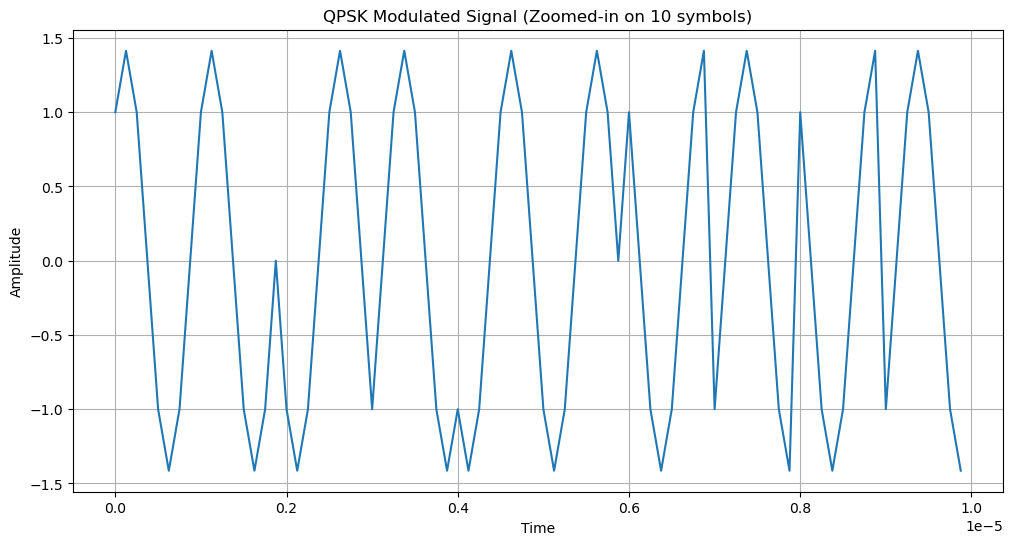

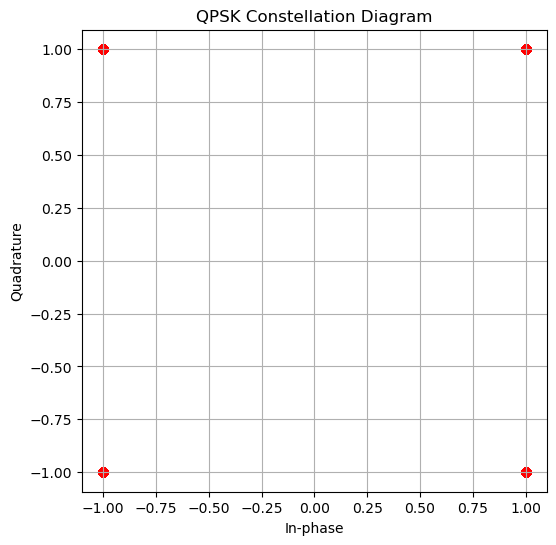


QPSK - First 10 symbols: [ 1.-1.j  1.-1.j -1.+1.j -1.-1.j -1.+1.j -1.+1.j  1.+1.j -1.-1.j  1.+1.j
 -1.-1.j]


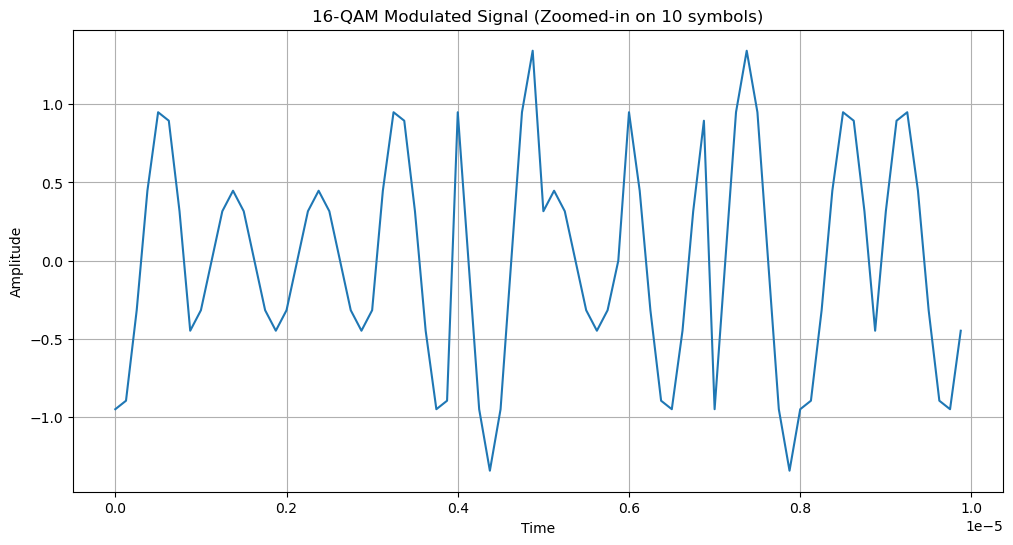

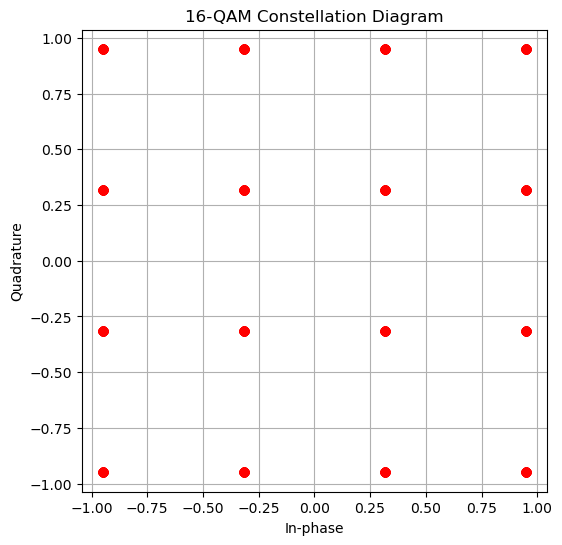


16-QAM - First 10 symbols: [-0.9486833 +0.31622777j -0.31622777-0.31622777j -0.31622777-0.31622777j
 -0.31622777-0.9486833j   0.9486833 +0.9486833j   0.31622777-0.31622777j
  0.9486833 +0.31622777j -0.9486833 -0.9486833j  -0.9486833 +0.31622777j
  0.31622777-0.9486833j ]


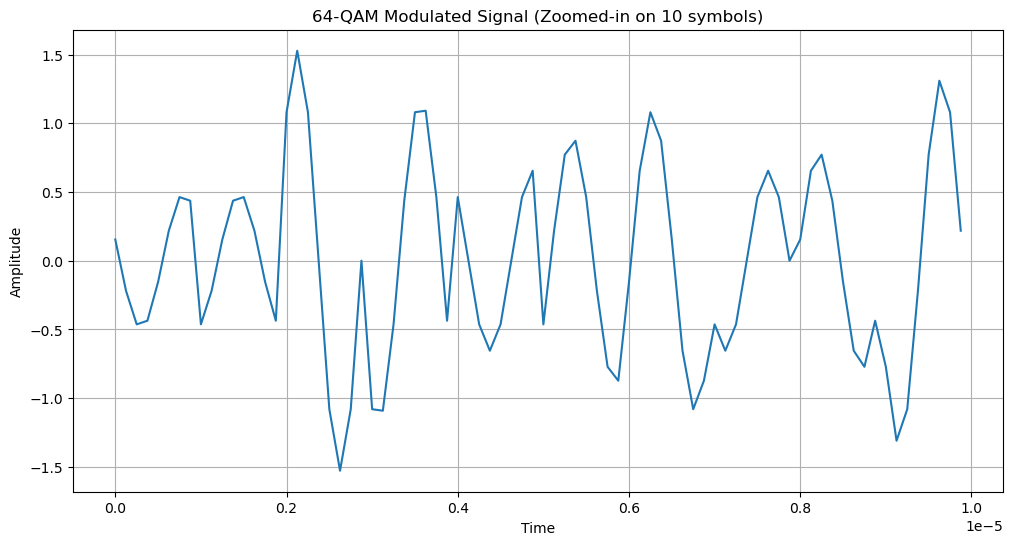

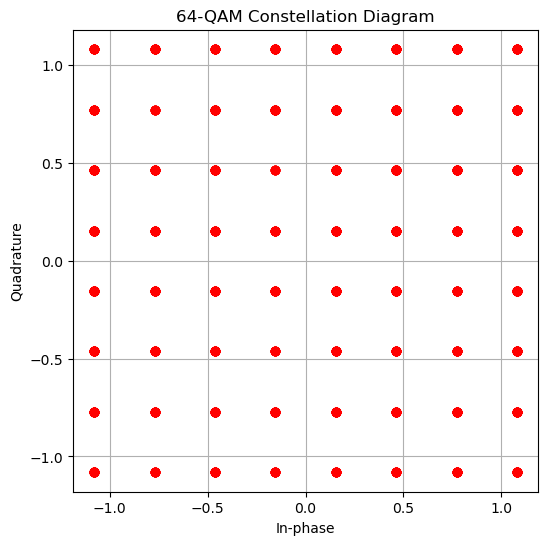


64-QAM - First 10 symbols: [ 0.15430335+0.46291005j -0.46291005-0.15430335j  1.08012345-1.08012345j
 -1.08012345+0.46291005j  0.46291005+0.46291005j -0.46291005-0.77151675j
 -0.15430335-1.08012345j -0.46291005+0.46291005j  0.15430335-0.77151675j
 -0.77151675+1.08012345j]


In [21]:
dvbs2x = DVBS2X(num_symbols=1000, samples_per_symbol=8, carrier_freq=1e6)

modulation_schemes = [
    ('QPSK', dvbs2x.generate_qpsk),
    ('16-QAM', dvbs2x.generate_16qam),
    ('64-QAM', dvbs2x.generate_64qam),
]

for name, func in modulation_schemes:
    (t, signal), symbols, bits = func()
    dvbs2x.plot_signal(t, signal, name)
    dvbs2x.plot_constellation(symbols, name)
    print(f"\n{name} - First 10 symbols:", symbols[:10])
